In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
routes_to_neighborhoods = pd.read_csv('data/routes_to_neighborhoods_new.csv')
travel_times = pd.read_csv('data/travel_times.csv')
delays = pd.read_csv('data/delays.csv')

In [12]:
travel_times['route_id'] = travel_times['route_id'].apply(lambda x: '746' if str(x).startswith('746_') else x)
delays['route_id'] = delays['route_id'].apply(lambda x: '746' if str(x).startswith('746_') else x)
route_ids = routes_to_neighborhoods['route_id']
filtered_travel_times = travel_times[travel_times['route_id'].isin(route_ids)]
filtered_delays = delays[delays['route_id'].isin(route_ids)]

In [13]:
print(filtered_travel_times[['route_id', 'scheduled_travel_time', 'travel_time']])

       route_id scheduled_travel_time travel_time
0            26              00:10:00    00:10:06
1            21              00:14:00    00:13:53
2            42              00:11:00    00:10:30
3            24              00:21:00    00:19:33
4            24              00:24:00    00:22:29
...         ...                   ...         ...
333298       86              00:53:00    00:51:39
333299       86              01:00:00    00:51:53
333300       86              00:34:00    00:33:24
333301       86              00:48:00    00:45:01
333302       86              00:48:00    00:49:08

[242839 rows x 3 columns]


In [14]:
filtered_travel_times['scheduled_travel_time'] = pd.to_datetime(filtered_travel_times['scheduled_travel_time'], format='mixed')
filtered_travel_times['travel_time'] = pd.to_datetime(filtered_travel_times['travel_time'], format='mixed')
filtered_travel_times['lateness'] = (filtered_travel_times['travel_time'] - filtered_travel_times['scheduled_travel_time']).dt.total_seconds() / 60
average_lateness_by_route = filtered_travel_times.groupby('route_id')['lateness'].mean()
sorted_routes = average_lateness_by_route.sort_values(ascending=True)
five_least_late = sorted_routes.head(5)
five_most_late = sorted_routes.tail(5).sort_values(ascending=False)
most_late_route_ids = five_most_late.index.get_level_values('route_id').tolist()
least_late_route_ids = five_least_late.index.get_level_values('route_id').tolist()

print(most_late_route_ids)
print(least_late_route_ids)

C:\Users\munir\AppData\Local\Temp\ipykernel_24200\3850961901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['scheduled_travel_time'] = pd.to_datetime(filtered_travel_times['scheduled_travel_time'], format='mixed')


['746', 'CT2', '92', '121', '426']
['428', '14', '86', '505', '171']


C:\Users\munir\AppData\Local\Temp\ipykernel_24200\3850961901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['travel_time'] = pd.to_datetime(filtered_travel_times['travel_time'], format='mixed')
C:\Users\munir\AppData\Local\Temp\ipykernel_24200\3850961901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_travel_times['lateness'] = (filtered_travel_times['travel_time'] - filtered_travel_times['scheduled_travel_time']).dt.total_seconds() / 60


In [15]:
# neighborhoods_most_late = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].astype(str).isin(most_late_route_ids)]['neighborhood']
# neighborhoods_least_late = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].astype(str).isin(least_late_route_ids)]['neighborhood']

# neighborhoods_most_late_list = [ast.literal_eval(neigh_str) for neigh_str in neighborhoods_most_late]
# neighborhoods_most_late_list = set([neighborhood for sublist in neighborhoods_most_late_list for neighborhood in sublist])
# neighborhoods_least_late_list = [ast.literal_eval(neigh_str) for neigh_str in neighborhoods_least_late]
# neighborhoods_least_late_list = set([neighborhood for sublist in neighborhoods_least_late_list for neighborhood in sublist])

# print(neighborhoods_most_late_list)
# print(neighborhoods_least_late_list)
# print(neighborhoods_least_late_list.intersection(neighborhoods_most_late_list))

In [16]:
most_late_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(most_late_route_ids)].copy()
most_late_routes_data = most_late_routes_data.drop(columns='stop_id')
most_late_routes_data['neighborhood'] = most_late_routes_data['neighborhood'].apply(eval)
most_late_routes_data['neighborhood'] = most_late_routes_data['neighborhood'].apply(lambda x: list(set(x)))

least_late_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(least_late_route_ids)].copy()
least_late_routes_data = least_late_routes_data.drop(columns='stop_id')
least_late_routes_data['neighborhood'] = least_late_routes_data['neighborhood'].apply(eval)
least_late_routes_data['neighborhood'] = least_late_routes_data['neighborhood'].apply(lambda x: list(set(x)))

In [17]:
print(most_late_routes_data)
print(least_late_routes_data)

   route_id                                       neighborhood
17      121                                      [East Boston]
58      426                                         [Downtown]
79      746                [Downtown, South Boston Waterfront]
84       92                            [Downtown, Charlestown]
87      CT2  [Mission Hill, Roxbury, Charlestown, Fenway, L...
   route_id                                       neighborhood
18       14  [Roslindale, Mission Hill, Roxbury, Hyde Park,...
22      171               [South Boston, Roxbury, East Boston]
59      428                                         [Downtown]
68      505                                         [Downtown]
80       86                   [Brighton, Charlestown, Allston]


In [18]:
census_data = pd.read_csv('data/census_data.csv', skiprows=1)

In [19]:
census_data = census_data.rename(columns={'White alone': 'White',
                     'Black or African American alone': 'Black/African American',
                     'Hispanic or Latino': 'Hispanic/Latino',
                     'Asian, Native Hawaiian and Pacific Islander alone, all ages': 'Asian/Native Hawaiian/Pacific Islander',
                     'Other Races or Multiple Races,  all ages': 'Other/Multiple Races',
                     'Total:': 'Total',
                     'Total:.1': 'Adults',
                     'Total: aged 0-17': 'Children (Ages 0-17)'})

columns_interested = ['White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races', 'College/University student housing', 'Total', 'Adults', 'Children (Ages 0-17)']

In [20]:
census_data.head()

,field concept,Total,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,Adults,White alone.1,Black or African American alone.1,...,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant,household size,zipcode
0,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,3281,3214,0,67,10748,10027,721,2.156478,02134
1,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,0,1610,1487,0,123,11524,10006,1518,1.630122,"02199,02116,"
2,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,33,0,0,33,6037,5485,552,1.696080,"02108,02114,"
3,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,56,3796,3493,0,303,23653,22535,1118,2.126292,02135
4,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,0,55,0,30,25,9525,8932,593,2.128303,02129


In [21]:
def calculate_sum(route_neighborhoods, column):
    total_sum = 0
    filtered_census_data = census_data[census_data['field concept'].apply(lambda x: any(neigh in x for neigh in route_neighborhoods))]
    total_sum += filtered_census_data[column].sum()
    return total_sum

for column in columns_interested:
    most_late_routes_data[column] = most_late_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))
    least_late_routes_data[column] = least_late_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))

In [22]:
most_late_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing,Total,Adults,Children (Ages 0-17)
17,121,[East Boston],15760,1403,21700,1932,2271,0,43066,34826,8240
58,426,[Downtown],8730,569,967,3018,484,3283,13768,12975,793
79,746,"[Downtown, South Boston Waterfront]",13045,729,1283,3500,790,3283,19347,18261,1086
84,92,"[Downtown, Charlestown]",22356,1559,3042,4668,1263,3283,32888,28636,4252
87,CT2,"[Mission Hill, Roxbury, Charlestown, Fenway, L...",72250,32015,29667,21460,10019,23606,165411,141445,23966


In [23]:
least_late_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing,Total,Adults,Children (Ages 0-17)
18,14,"[Roslindale, Mission Hill, Roxbury, Hyde Park,...",105210,97000,73064,28113,26189,4246,329576,264814,64762
22,171,"[South Boston, Roxbury, East Boston]",77269,29028,46103,10164,10092,2520,172656,142335,30321
59,428,[Downtown],8730,569,967,3018,484,3283,13768,12975,793
68,505,[Downtown],8730,569,967,3018,484,3283,13768,12975,793
80,86,"[Brighton, Charlestown, Allston]",58856,4730,10710,16624,5151,6707,96071,86458,9613


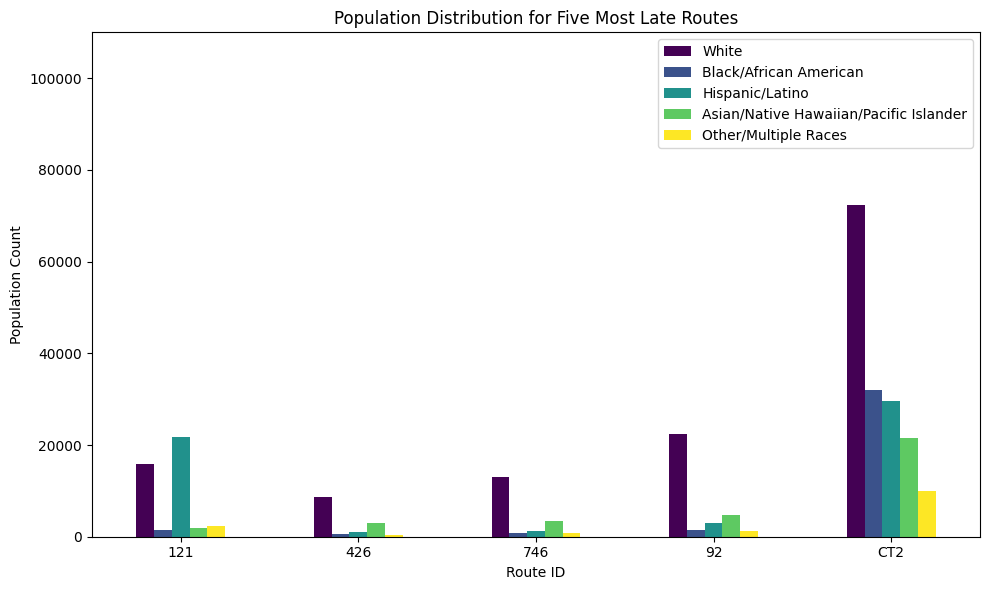

In [24]:
most_late_race_data = most_late_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
most_late_race_data.set_index('route_id', inplace=True)

most_late_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Most Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,110000)
plt.tight_layout()
plt.show()

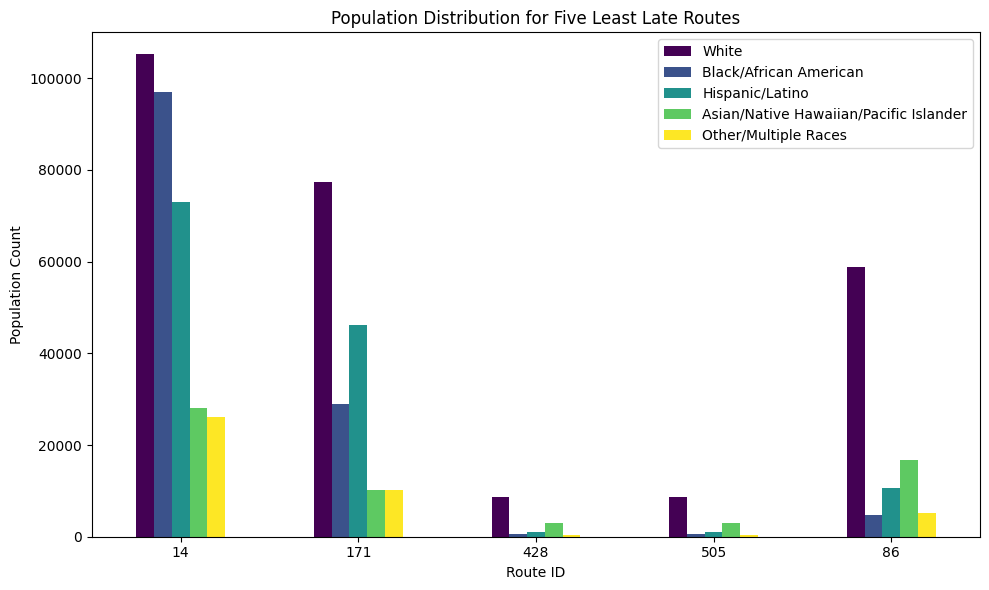

In [25]:
least_late_race_data = least_late_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
least_late_race_data.set_index('route_id', inplace=True)

least_late_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Least Late Routes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0,110000)
plt.show()

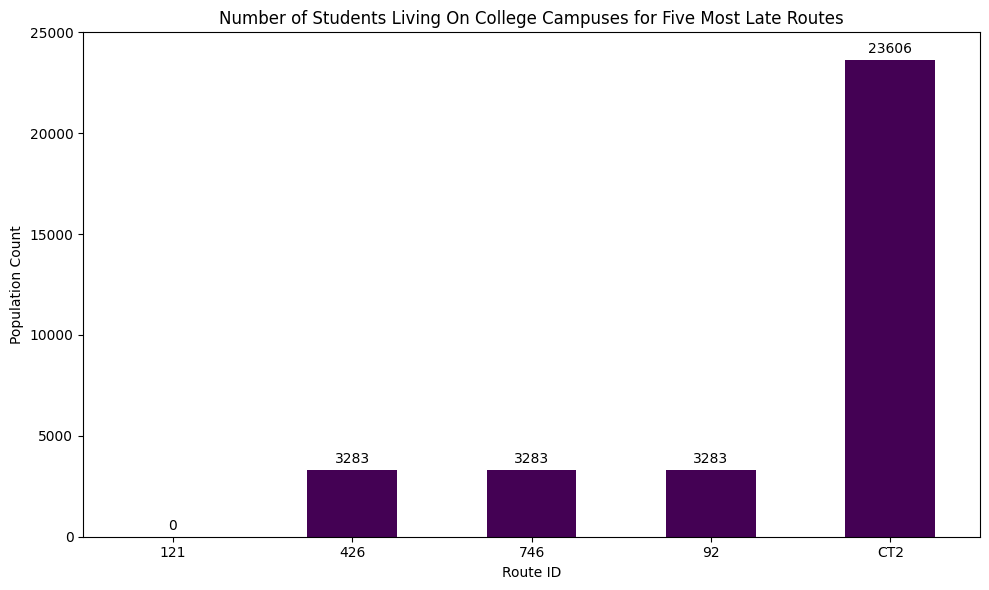

In [26]:
most_late_college_data = most_late_routes_data[['route_id', 'College/University student housing']]
most_late_college_data.set_index('route_id', inplace=True)

most_late_college_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Most Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,25000)

for index, value in enumerate(most_late_college_data['College/University student housing']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

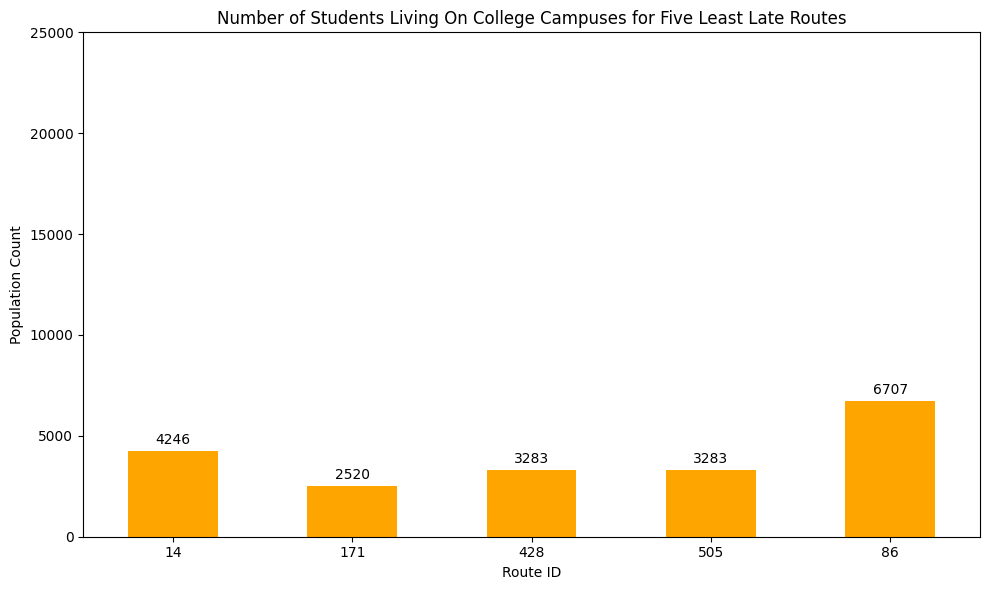

In [27]:
least_late_college_data = least_late_routes_data[['route_id', 'College/University student housing']]
least_late_college_data.set_index('route_id', inplace=True)

least_late_college_data.plot(kind='bar', figsize=(10,6), color='orange', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Least Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,25000)

for index, value in enumerate(least_late_college_data['College/University student housing']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

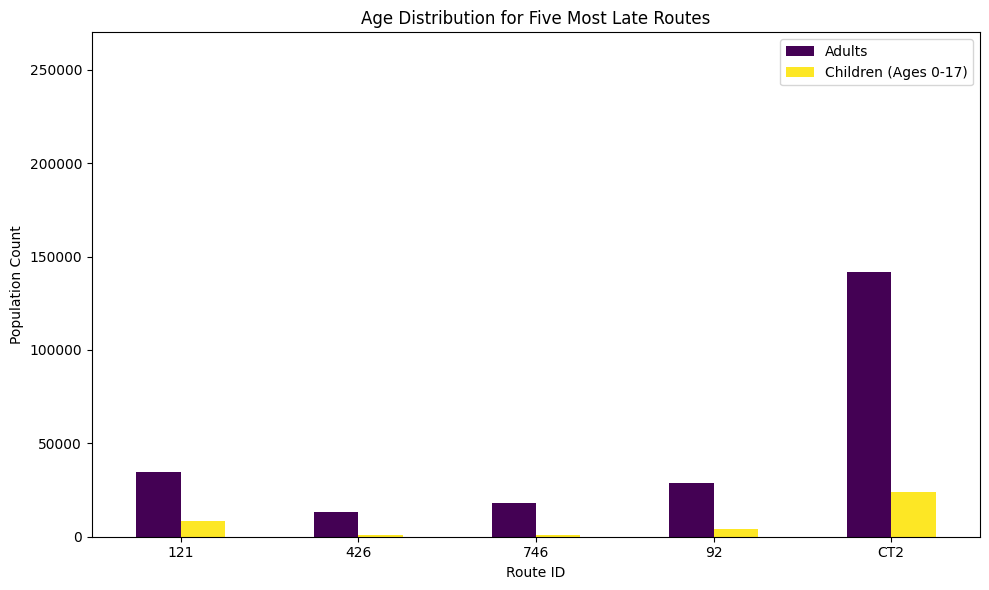

In [28]:
most_late_age_data = most_late_routes_data[['route_id', 'Adults', 'Children (Ages 0-17)']]
most_late_age_data.set_index('route_id', inplace=True)

most_late_age_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Age Distribution for Five Most Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,270000)
plt.tight_layout()
plt.show()

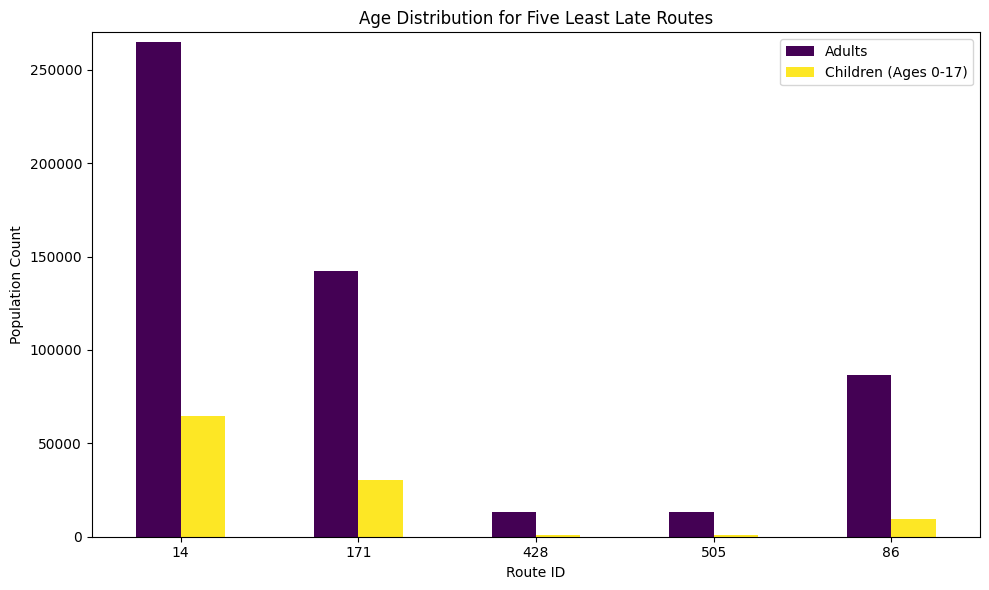

In [29]:
least_late_age_data = least_late_routes_data[['route_id', 'Adults', 'Children (Ages 0-17)']]
least_late_age_data.set_index('route_id', inplace=True)

least_late_age_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Age Distribution for Five Least Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,270000)
plt.tight_layout()
plt.show()

In [30]:
filtered_delays['abs_delay'] = filtered_delays['delay'].abs()
average_delay_by_route = filtered_delays.groupby('route_id')['abs_delay'].mean()
sorted_routes = average_delay_by_route.sort_values(ascending=True)
five_most_punctual = sorted_routes.head(5)
five_least_punctual = sorted_routes.tail(5).sort_values(ascending=False)
most_punctual_route_ids = five_most_punctual.index.get_level_values('route_id').tolist()
least_punctual_route_ids = five_least_punctual.index.get_level_values('route_id').tolist()

print(most_punctual_route_ids)
print(least_punctual_route_ids)

['33', '191', '354', '91', '64']
['171', 'CT2', '746', '210', '117']


C:\Users\munir\AppData\Local\Temp\ipykernel_24200\2219433158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_delays['abs_delay'] = filtered_delays['delay'].abs()


In [31]:
most_punctual_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(most_punctual_route_ids)].copy()
most_punctual_routes_data = most_punctual_routes_data.drop(columns='stop_id')
most_punctual_routes_data['neighborhood'] = most_punctual_routes_data['neighborhood'].apply(eval)
most_punctual_routes_data['neighborhood'] = most_punctual_routes_data['neighborhood'].apply(lambda x: list(set(x)))

least_punctual_routes_data = routes_to_neighborhoods[routes_to_neighborhoods['route_id'].isin(least_punctual_route_ids)].copy()
least_punctual_routes_data = least_punctual_routes_data.drop(columns='stop_id')
least_punctual_routes_data['neighborhood'] = least_punctual_routes_data['neighborhood'].apply(eval)
least_punctual_routes_data['neighborhood'] = least_punctual_routes_data['neighborhood'].apply(lambda x: list(set(x)))

In [32]:
print(most_punctual_routes_data)
print(least_punctual_routes_data)

   route_id                                       neighborhood
25      191  [Downtown, Roxbury, Mattapan, Dorchester, Sout...
46       33  [West Roxbury, Roslindale, Hyde Park, Mattapan...
50      354                                         [Downtown]
74       64                                [Brighton, Allston]
83       91                                      [Charlestown]
   route_id                                       neighborhood
15      117                            [Downtown, East Boston]
22      171               [South Boston, Roxbury, East Boston]
32      210                                       [Dorchester]
79      746                [Downtown, South Boston Waterfront]
87      CT2  [Mission Hill, Roxbury, Charlestown, Fenway, L...


In [33]:
for column in columns_interested:
    most_punctual_routes_data[column] = most_punctual_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))
    least_punctual_routes_data[column] = least_punctual_routes_data['neighborhood'].apply(lambda x: calculate_sum(x, column))

In [34]:
most_punctual_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing,Total,Adults,Children (Ages 0-17)
25,191,"[Downtown, Roxbury, Mattapan, Dorchester, Sout...",83047,88755,54533,27417,23045,5803,276797,222777,54020
46,33,"[West Roxbury, Roslindale, Hyde Park, Mattapan...",65516,45512,31888,7707,8551,224,159174,129214,29960
50,354,[Downtown],8730,569,967,3018,484,3283,13768,12975,793
74,64,"[Brighton, Allston]",45230,3740,8635,14974,4372,6707,76951,70797,6154
83,91,[Charlestown],13626,990,2075,1650,779,0,19120,15661,3459


In [35]:
least_punctual_routes_data.head()

,route_id,neighborhood,White,Black/African American,Hispanic/Latino,Asian/Native Hawaiian/Pacific Islander,Other/Multiple Races,College/University student housing,Total,Adults,Children (Ages 0-17)
15,117,"[Downtown, East Boston]",24490,1972,22667,4950,2755,3283,56834,47801,9033
22,171,"[South Boston, Roxbury, East Boston]",77269,29028,46103,10164,10092,2520,172656,142335,30321
32,210,[Dorchester],27411,42714,25285,13360,13421,0,122191,95365,26826
79,746,"[Downtown, South Boston Waterfront]",13045,729,1283,3500,790,3283,19347,18261,1086
87,CT2,"[Mission Hill, Roxbury, Charlestown, Fenway, L...",72250,32015,29667,21460,10019,23606,165411,141445,23966


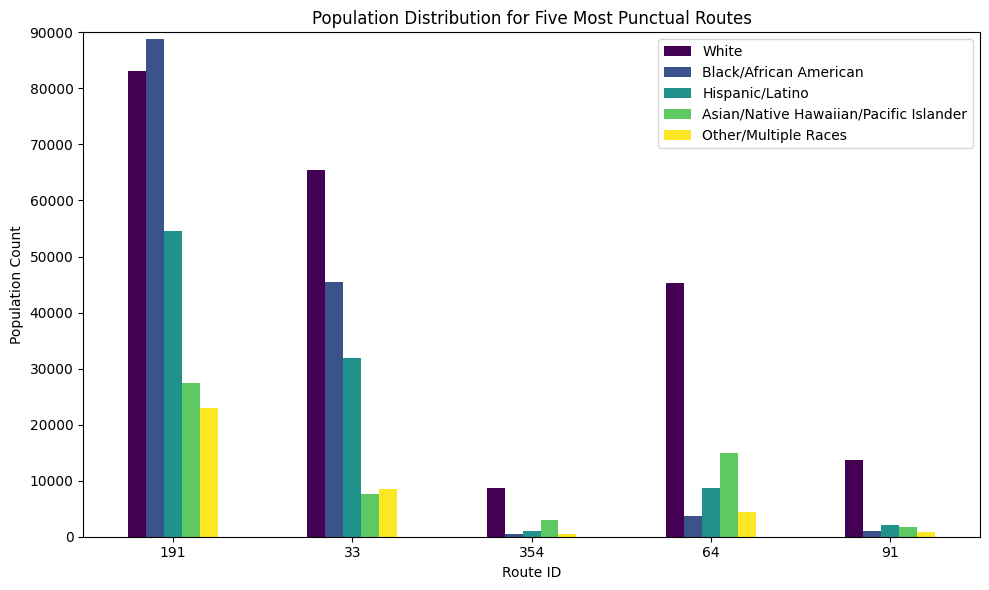

In [39]:
most_punctual_race_data = most_punctual_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
most_punctual_race_data.set_index('route_id', inplace=True)

most_punctual_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Most Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,90000)
plt.tight_layout()
plt.show()


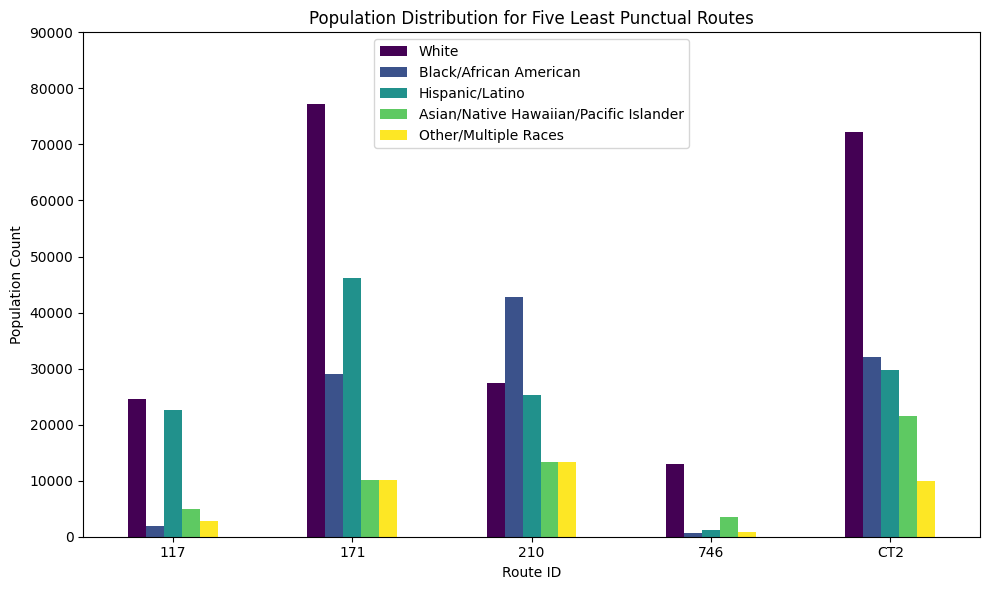

In [40]:
least_punctual_race_data = least_punctual_routes_data[['route_id', 'White', 'Black/African American', 'Hispanic/Latino', 'Asian/Native Hawaiian/Pacific Islander', 'Other/Multiple Races']]
least_punctual_race_data.set_index('route_id', inplace=True)

least_punctual_race_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Population Distribution for Five Least Punctual Routes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0,90000)
plt.show()

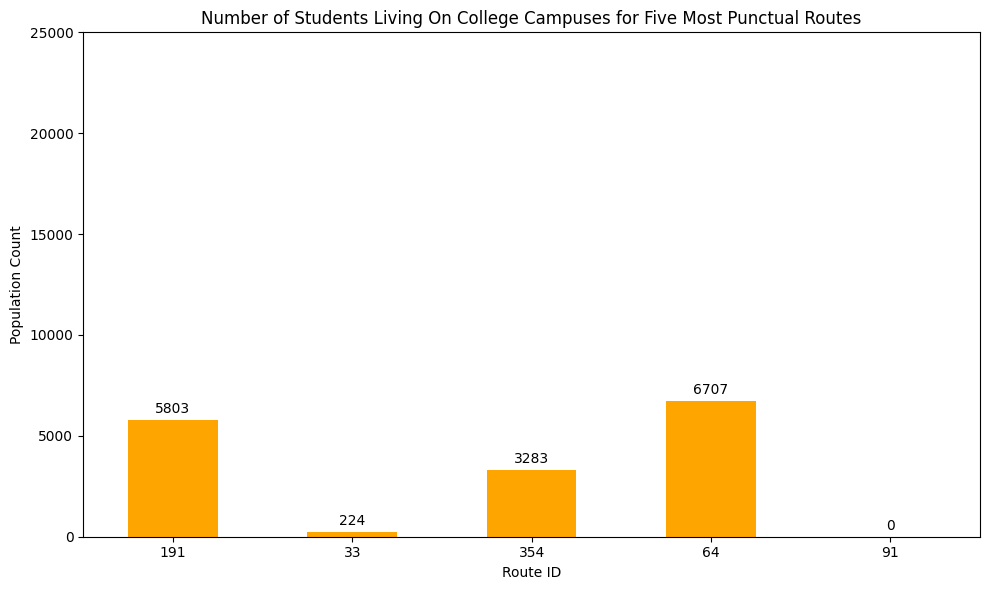

In [46]:
most_punctual_college_data = most_punctual_routes_data[['route_id', 'College/University student housing']]
most_punctual_college_data.set_index('route_id', inplace=True)

most_punctual_college_data.plot(kind='bar', figsize=(10,6), color='orange', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Most Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,25000)

for index, value in enumerate(most_punctual_college_data['College/University student housing']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

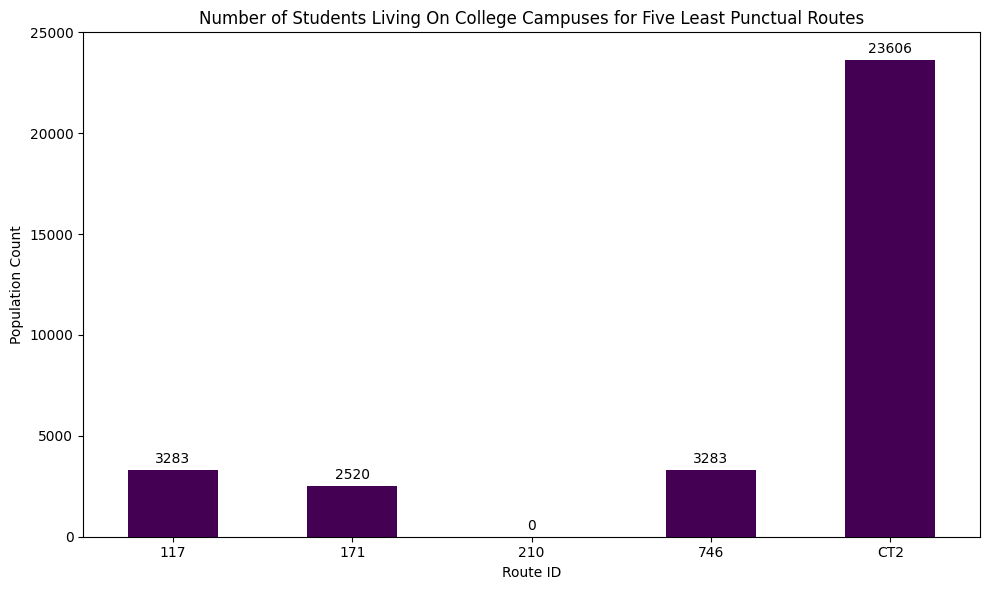

In [48]:
least_punctual_college_data = least_punctual_routes_data[['route_id', 'College/University student housing']]
least_punctual_college_data.set_index('route_id', inplace=True)

least_punctual_college_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Number of Students Living On College Campuses for Five Least Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,25000)

for index, value in enumerate(least_punctual_college_data['College/University student housing']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

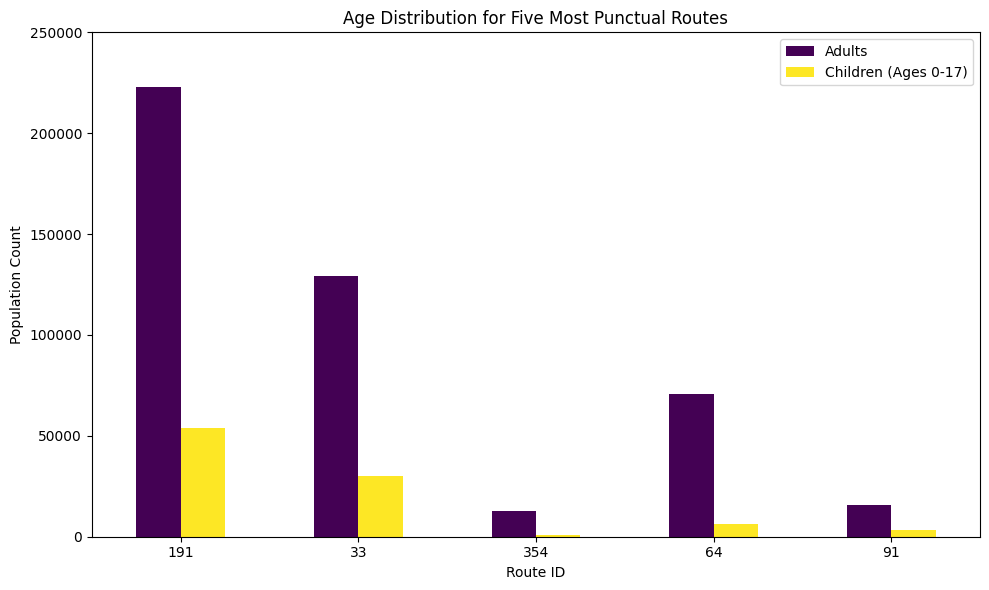

In [52]:
most_punctual_age_data = most_punctual_routes_data[['route_id', 'Adults', 'Children (Ages 0-17)']]
most_punctual_age_data.set_index('route_id', inplace=True)

most_punctual_age_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Age Distribution for Five Most Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,250000)
plt.tight_layout()
plt.show()

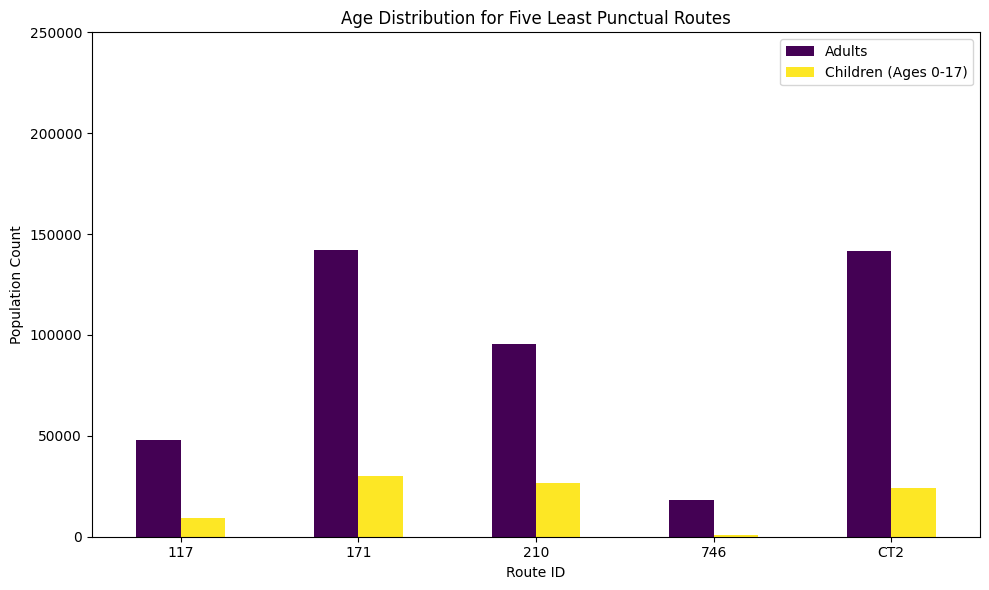

In [51]:
least_punctual_age_data = least_punctual_routes_data[['route_id', 'Adults', 'Children (Ages 0-17)']]
least_punctual_age_data.set_index('route_id', inplace=True)

least_punctual_age_data.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Age Distribution for Five Least Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,250000)
plt.tight_layout()
plt.show()

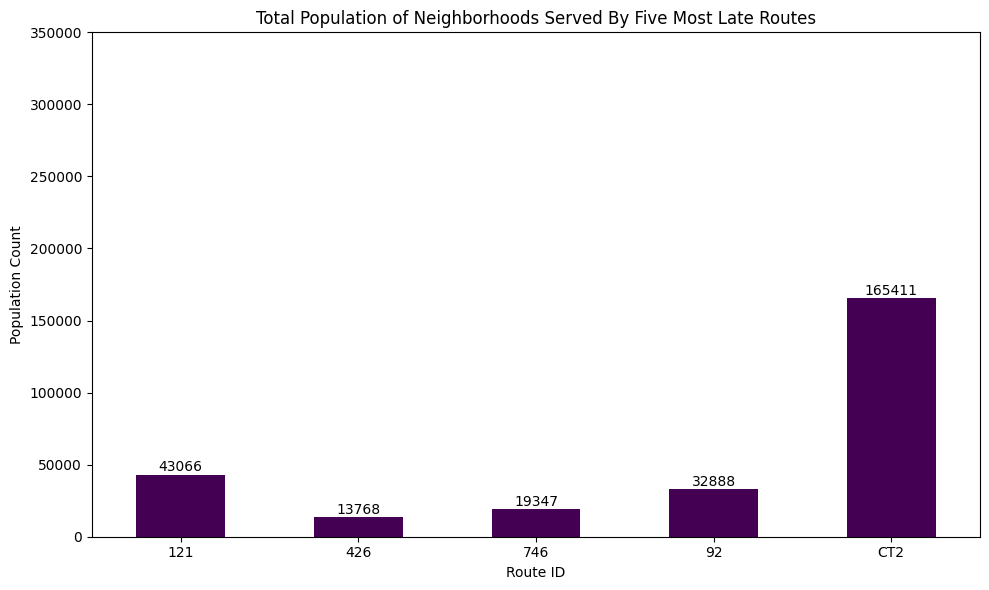

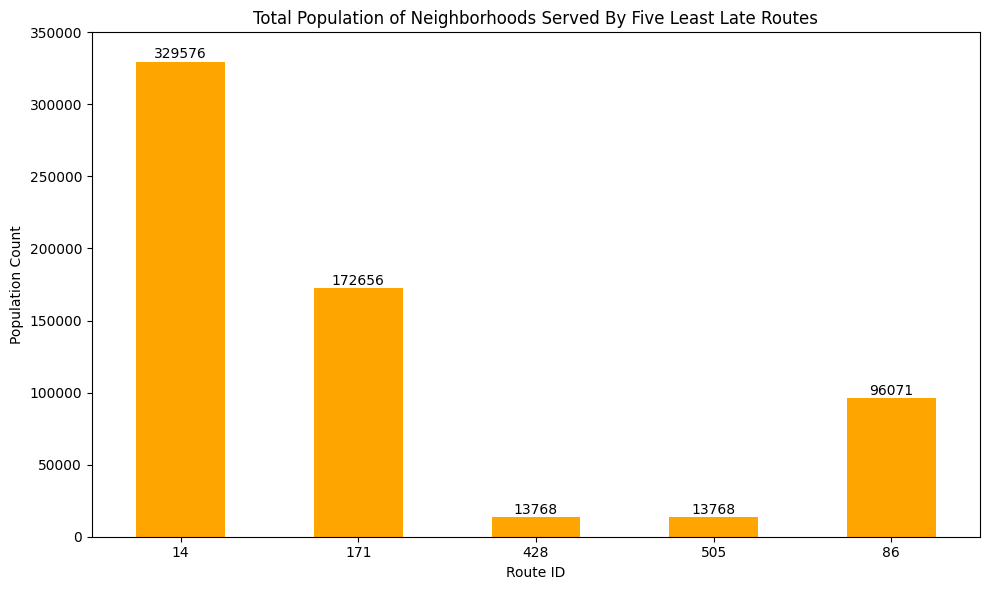

In [57]:
most_late_population_data = most_late_routes_data[['route_id', 'Total']]
most_late_population_data.set_index('route_id', inplace=True)

most_late_population_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Total Population of Neighborhoods Served By Five Most Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,350000)

for index, value in enumerate(most_late_population_data['Total']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

least_late_population_data = least_late_routes_data[['route_id', 'Total']]
least_late_population_data.set_index('route_id', inplace=True)

least_late_population_data.plot(kind='bar', figsize=(10,6), color='orange', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Total Population of Neighborhoods Served By Five Least Late Routes')
plt.xticks(rotation=0)
plt.ylim(0,350000)

for index, value in enumerate(least_late_population_data['Total']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

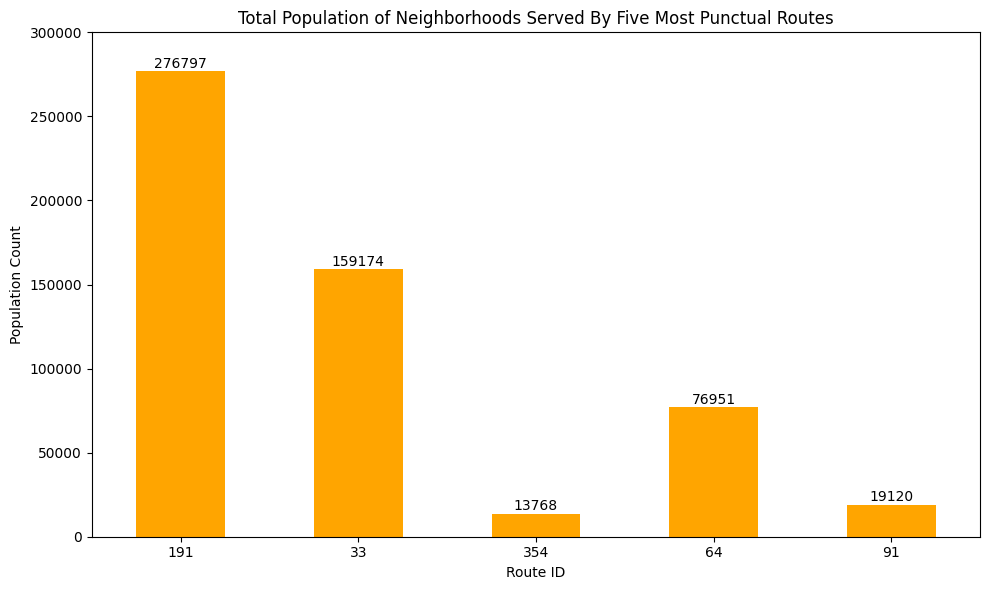

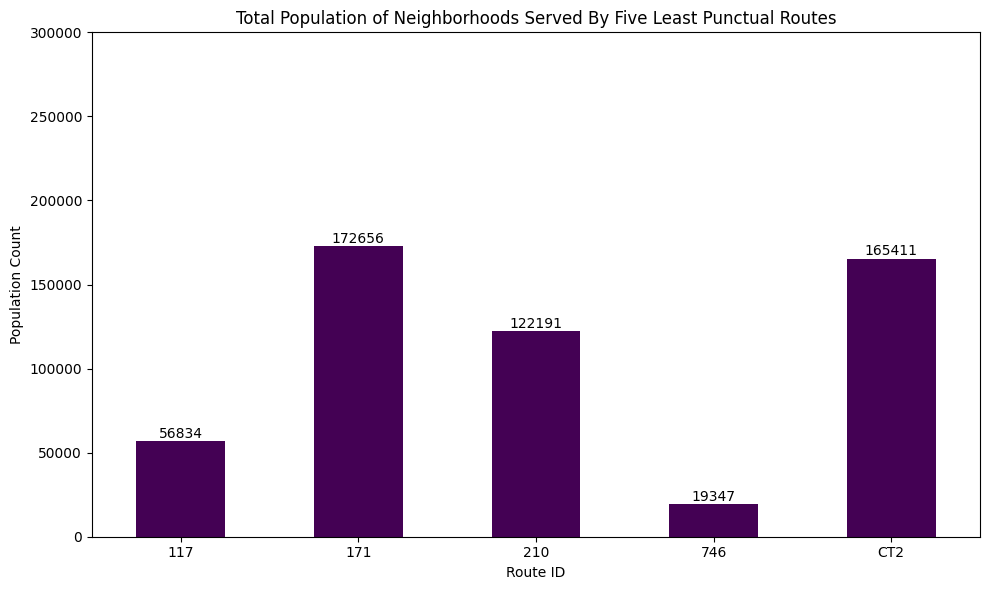

In [62]:
most_punctual_population_data = most_punctual_routes_data[['route_id', 'Total']]
most_punctual_population_data.set_index('route_id', inplace=True)

most_punctual_population_data.plot(kind='bar', figsize=(10,6), color='orange', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Total Population of Neighborhoods Served By Five Most Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,300000)

for index, value in enumerate(most_punctual_population_data['Total']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

least_punctual_population_data = least_punctual_routes_data[['route_id', 'Total']]
least_punctual_population_data.set_index('route_id', inplace=True)

least_punctual_population_data.plot(kind='bar', figsize=(10,6), colormap='viridis', legend=False)
plt.xlabel('Route ID')
plt.ylabel('Population Count')
plt.title('Total Population of Neighborhoods Served By Five Least Punctual Routes')
plt.xticks(rotation=0)
plt.ylim(0,300000)

for index, value in enumerate(least_punctual_population_data['Total']):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()